# TP2 - Bayes Inference

In [2]:
# @title Helper Functions 
import numpy as np
import matplotlib.pyplot as plt

def plot_myarray(array, xlabel, ylabel, title):
    """ Plot an array with labels.

    Args :
    array (numpy array of floats)
    xlabel (string) - label of x-axis
    ylabel (string) - label of y-axis
    title  (string) - title of plot

    Returns:
    None
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colormap = ax.imshow(array, extent=[-10, 10, 8, -8])
    cbar = plt.colorbar(colormap, ax=ax)
    cbar.set_label('probability')
    ax.invert_yaxis()
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_aspect('auto')
    return None

def moments_myfunc(x_points, function):
    """
    DO NOT EDIT THIS FUNCTION !!!

  Returns the mean, median and mode of an arbitrary function

  Args :
    x_points (numpy array of floats) - x-axis values
    function (numpy array of floats) - y-axis values of the function evaluated at `x_points`

  Returns:
    (tuple of 3 scalars): mean, median, mode
  """

  # Calc mode of arbitrary function
    mode = x_points[np.argmax(function)]

  # Calc mean of arbitrary function
    mean = np.sum(x_points * function)

    # Calc median of arbitrary function
    cdf_function = np.zeros_like(x_points)
    accumulator = 0
    for i in np.arange(x_points.shape[0]):
        accumulator = accumulator + function[i]
        cdf_function[i] = accumulator
    idx = np.argmin(np.abs(cdf_function - 0.5))
    median = x_points[idx]

    return mean, median, mode

## Tutorial Objectives

At the end of this tutorial you should be able to : 

1. Understand and implement Bayes' theorem to compute the posterior distribution
2. Use Bayes' theorem to infer a human's decision


# Section 1. Bayes' Theorem and the Posterior

Bayes' rule states:

\begin{eqnarray}
\text{Posterior} = \dfrac{ \text{Likelihood} \times \text{Prior}}{ \text{Normalization constant}}
\end{eqnarray}

When both the prior and likelihood are Gaussians, this translates into the following form:

$$
\begin{array}{rcl}
\text{Likelihood} &=& \mathcal{N}(\mu_{likelihood},\sigma_{likelihood}^2) \\
\text{Prior} &=& \mathcal{N}(\mu_{prior},\sigma_{prior}^2) \\
\text{Posterior} &\propto& \mathcal{N}(\mu_{likelihood},\sigma_{likelihood}^2) \times \mathcal{N}(\mu_{prior},\sigma_{prior}^2) \\
&&= \mathcal{N}\left( \dfrac{\sigma^2_{likelihood}\mu_{prior}+\sigma^2_{prior}\mu_{likelihood}}{\sigma^2_{likelihood}+\sigma^2_{prior}}, \dfrac{\sigma^2_{likelihood}\sigma^2_{prior}}{\sigma^2_{likelihood}+\sigma^2_{prior}} \right) 
\end{array}
$$

In these equations, $\mathcal{N}(\mu,\sigma^2)$ denotes a Gaussian distribution with parameters $\mu$ and $\sigma^2$:
$$
\mathcal{N}(\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \; \exp \bigg( \frac{-(x-\mu)^2}{2\sigma^2} \bigg)
$$
 

## Exercise 1A: Finding the posterior computationally

Imagine an experiment where participants estimate the location of tennis ball. To estimate its position, they can use two sources of information: 
  1. New noisy visual information (the likelihood)
  2. Prior expectations of where the ball is likely to be found (prior). 

Use Bayes' rule to combine the likelihood (noisy visual information) and the prior to compute the posterior distribution.

Hint: 

* Use the gaussian function you wrote in the previous tutorial to generate a visual likelihood with parameters $\mu$ = 3 and $\sigma$ = 1.5
* Generate a Gaussian prior with parameters $\mu$ = -1 and $\sigma$ = 1.5
* Calculate the posterior using pointwise multiplication of the likelihood and prior. Don't forget to normalize so the posterior adds up to 1. **Question : Why do we need to normalize?**



In [3]:
def my_gaussian(x_vector,mu,sigma):
    """
  Author: Antoine de Comite 
  This function computes the gaussian distribution characterised by mu & sigma on the set x_vector
  
  Inputs : x_vector (numpy array) the set over which you want to compute the gaussian distribution
           mu (double) mean value of the gaussian distribution
           sigma (double) standard deviation of the gaussian distribution
  Outputs: px (numpy array) is the gaussian distribution evaluated over x_vector
  """
  
    px = np.exp(- 1/2/sigma**2 * (mu - x_vector) ** 2)
    px = px / px.sum()
    return px

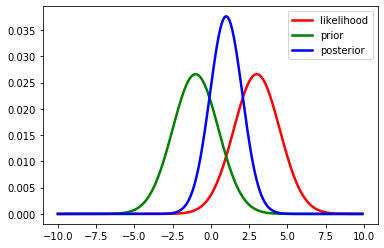

In [12]:
x_vector = np.arange(-10,10,0.1)

#######################################


def compute_posterior_pointwise(prior, likelihood):
    ''' Author: Florence Blondiaux
    Returns the normalized posterior probability based on the prior and the likelihood
    Prior: The prior probabilities
    Likelihood: The likelihood probabilities
    '''
    posterior = prior * likelihood
    posterior /= posterior.sum()
    return posterior 

likelihood = my_gaussian(x_vector,3,1.5)
prior = my_gaussian(x_vector,-1,1.5)
posterior = compute_posterior_pointwise(prior,likelihood)

plt.plot(x_vector, likelihood, 'r',Linewidth=2.5,label='likelihood')
plt.plot(x_vector,prior,'g',Linewidth=2.5,label='prior')
plt.plot(x_vector, posterior, 'b',Linewidth=2.5,label='posterior')
plt.legend()
plt.show()

In [10]:
#@title
#@markdown Make sure you execute this cell to enable the widget!

x = np.arange(-10, 11, 0.1)

import ipywidgets as widgets

def refresh(mu_likelihood=3, sigma_likelihood=1.5, mu_prior=-1, sigma_prior=1.5):
    likelihood = my_gaussian(x, mu_likelihood, sigma_likelihood)
    prior = my_gaussian(x, mu_prior, sigma_prior)
    posterior = compute_posterior_pointwise(prior,likelihood)
    plt.plot(x, likelihood, 'r')
    plt.plot(x,prior,'g')
    plt.plot(x, posterior, 'b')

style = {'description_width': 'initial'}

_ = widgets.interact(refresh,
    mu_posterior=widgets.FloatSlider(value=3, min=-10, max=10, step=0.5, description="mu_likelihood:", style=style),
    sigma_posterior=widgets.FloatSlider(value=1.5, min=0.5, max=10, step=0.5, description="sigma_likelihood:", style=style),
    mu_prior=widgets.FloatSlider(value=-1, min=-10, max=10, step=0.5, description="mu_prior:", style=style),
    sigma_prior=widgets.FloatSlider(value=1.5, min=0.5, max=10, step=0.5, description="sigma_prior:", style=style)
)

interactive(children=(IntSlider(value=3, description='mu_likelihood', max=9, min=-3), FloatSlider(value=1.5, d…

## Exercise 1B: Finding the posterior analytically

**[Bonus]**

As you may have noticed from the interactive demo, the product of two Gaussian distributions, like our prior and likelihood, remains a Gaussian, regardless of the parameters. We can directly compute the  parameters of that Gaussian from the means and variances of the prior and likelihood. For example, the posterior mean is given by:

$$ \mu_{posterior} = \frac{\mu_{likelihood} \cdot \frac{1}{\sigma_{likelihood}^2} + \mu_{prior} \cdot \frac{1}{\sigma_{prior}^2}}{1/\sigma_{likelihood}^2 + 1/\sigma_{prior}^2} 
$$

This formula is a special case for two Gaussians, but is a very useful one because:
*   The posterior has the same form (here, a normal distribution) as the prior, and
*   There is simple, closed-form expression for its parameters.

When these properties hold, we call them **conjugate distributions** or **conjugate priors** (for a particular likelihood). Working with conjugate distributions is very convenient; otherwise, it is often necessary to use computationally-intensive numerical methods to combine the prior and likelihood. 

In this exercise, we ask you to verify that property.  To do so, we will hold our likelihood constant as an $\mathcal{N}(3, 1.5)$ distribution, while considering priors with different means ranging from $\mu=-10$ to $\mu=10$. For each prior,

* Compute the posterior distribution using the function you wrote in Exercise 2A. Next, find its mean. The mean of a probability distribution is $\int_x p(x) dx$ or $\sum_x x\cdot p(x)$. 
* Compute the analytical posterior mean from likelihood and prior using the equation above.
* Plot both estimates of the mean. 

Are the estimates of the posterior mean the same in both cases? 

Using these results, try to predict the posterior mean for the combination of a $\mathcal{N}(-4,4)$ prior and and $\mathcal{N}(4, 2)$ likelihood. Use the widget above to check your prediction. You can enter values directly by clicking on the numbers to the right of each slider; $\sqrt{2} \approx 1.41$.

Text(0, 0.5, 'Mean of the posterior distribution')

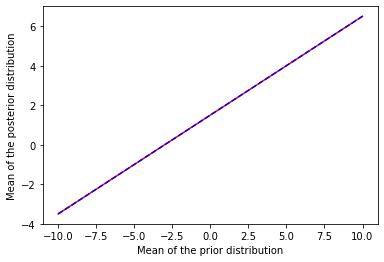

In [62]:
def compare_computational_analytical_means():
    x = np.arange(-10, 11, 0.1)
    # Fixed auditory likelihood
    mu_likelihood = 3
    sigma_likelihood = 1.5
    likelihood = my_gaussian(x, mu_likelihood, sigma_likelihood)
    # Varying visual prior
    mu_priors = np.linspace(-10, 10)
    sigma_prior = 1.5

    # Accumulate results here
    mus_by_integration = []
    mus_analytical = []
    for mu_prior in mu_priors:
        prior = my_gaussian(x, mu_prior, sigma_prior)
        posterior = compute_posterior_pointwise(prior, likelihood)
        mu_integrated = np.sum(x*posterior)
        mu_analytical = ((mu_likelihood / sigma_likelihood ** 2 + mu_prior / sigma_prior ** 2) /
                  (1 / sigma_likelihood ** 2 + 1 / sigma_prior ** 2))

        mus_by_integration.append(mu_integrated)
        mus_analytical.append(mu_analytical)

    return mu_priors, mus_analytical, mus_by_integration

mu_visuals, mu_analytical, mu_computational = compare_computational_analytical_means()
plt.plot(mu_visuals,mu_analytical,'r')
plt.plot(mu_visuals,mu_computational,'b--')
plt.xlabel('Mean of the prior distribution')
plt.ylabel('Mean of the posterior distribution')

# Section 2 - Apply Bayes' theorem

---
  
We'll now estimate the participant response given the posterior distribution. We will describe all the steps of the generative model first. The model will be the same Bayesian model we have been using during the previous exercice: a Gaussian prior and a Gaussian likelihood.

Steps:

* First, we'll create the prior, likelihood, posterior, etc in a form that will make it easier for us to visualise what is being computed and estimated at each step of the generative model: 
  1. Generating a Gaussian prior for multiple possible stimulus inputs
  2. Generating the likelihood for multiple possible stimulus inputs
  3. Estimating our posterior as a function of the stimulus input
  4. Estimating a participant response given the posterior
  


![Generative model](https://github.com/vincentvalton/figures_NMA_W2D1_T3/blob/master/Drawing%20Generative%20Model%20W2T3.png?raw=true)


Here is a graphical representation of the generative model:

  1. We present a stimulus $x$ to participants. 
  2. The brain encodes this true stimulus $x$ noisily (this is the brain's representation of the true visual stimulus: $p(\tilde x|x)$.
  3. The brain then combine this brain encoded stimulus (likelihood: $p(\tilde x|x)$) with prior information (the prior: $p(x)$) to make up the brain's estimated position of the true visual stimulus, the posterior: $p(x|\tilde x)$. 
  3. This brain's estimated stimulus position: $p(x|\tilde x)$, is then used to make a response:  $\hat x$, which is the participant's noisy estimate of the stimulus position (the participant's percept). 
  
Typically the response $\hat x$ also includes some motor noise (noise due to the hand/arm move being not 100% accurate), but we'll ignore it in this tutorial and assume there is no motor noise.

We will use the same experimental setup as in the previous exercice. Our subject tries to locates his glasses on his bed stand.

---
# 1: Likelihood array
    
First, we want to create a likelihood, but for the sake of visualization (and to consider all possible brain encodings) we will create multiple likelihoods $f(x)=p(\tilde x|x)$ (one for each potential encoded stimulus: $\tilde x$). We will then be able to visualize the likelihood as a function of hypothesized true stimulus positions: $x$ on the x-axis and encoded position $\tilde x$ on the y-axis.


  Using the equation for the `my_gaussian` and the values in `hypothetical_stim`:
* Create a Gaussian likelihood with mean varying from `hypothetical_stim`, keeping $\sigma_{likelihood}$ constant at 1.
* Each likelihood will have a different mean and thus a different row-likelihood of your 2D array, such that you end up with a likelihood array made up of 1,000 row-Gaussians with different means. (_Hint_: `np.tile` won't work here. You may need a for-loop).
* Plot the array using the function `plot_myarray()` already pre-written and commented-out in your script

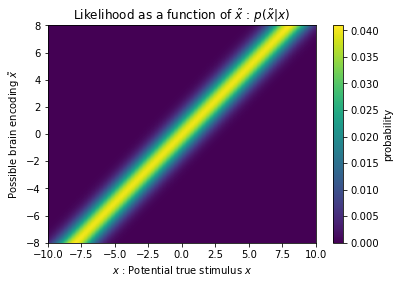

In [38]:
x = np.arange(-10, 10, 0.1)
hypothetical_stim = np.linspace(-8, 8, 1000)

def compute_likelihood_array(x_points, stim_array, sigma=1.):

    # initializing likelihood_array
    likelihood_array = np.zeros((len(stim_array), len(x_points)))

    # looping over stimulus array
    for i in range(len(stim_array)):
        likelihood_array[i, :] = my_gaussian(x_points, stim_array[i], sigma)

    return likelihood_array

likelihood_array = compute_likelihood_array(x, hypothetical_stim)

plot_myarray(likelihood_array,
              '$x$ : Potential true stimulus $x$',
              'Possible brain encoding $\~x$',
              'Likelihood as a function of $\~x$ : $p(\~x | x)$')

---
# 2: Mixture-of-Gaussians Prior

Our subject recently adopted a cat, sometimes (5% of the time to be exact) he forgets to close the door and his cat walks over the glasses during the night and moves them to a new location, flowing a normal distribution centered around 0 but with a larger variance. The prior will therefore result in a mix of gaussian. We want to create a prior that will describe the participants' prior knowledge that, 95% of the time their glasses are at the middle of the bed side table, while during the remaining 5% of the time, the cat moved them to another position during the night. We will embody this information into a prior using a mixture of Gaussians. 

In the previous exercices, you learned how to create a single Gaussian prior that could represent one of these possibilties. A broad Gaussian with a large $\sigma$ could represent the position of your glasses after his - very delicate - cat moved them , while a narrow Gaussian with $\mu$ near zero could represent the position of your glasses when you carefully put them on the table. 


<img alt='Solution hint' align='left' width=424 height=280 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W2D1_BayesianStatistics/static/W2D1_Tutorial2_Solution_2c2af4a2_1.png>


Here, we will combine those into a mixure-of-Gaussians probability density function (PDF) that captures both possibilties. We will control how the Gaussians are mixed by summing them together with a 'mixing' or weight parameter $p_{subject}$, set to a value between 0 and 1, like so:

\begin{eqnarray}
    \text{Mixture} = \bigl[\; p_{subject} \times \mathcal{N}(\mu_{subject},\sigma_{subject}) \; \bigr] + \bigl[ \;\underbrace{(1-p_{subject})}_{p_{cat}} \times \mathcal{N}(\mu_{cat},\sigma_{cat}) \; \bigr]
\end{eqnarray}

$p_{subject}$ denotes the probability that when the subject wakes up, his glasses are still in the place where he dropped them the day begofe. You might think that we need to include a separate weight for the possibility that the cat moved them. However, since there are only two, mutually-exclusive possibilties, we can replace $p_{cat}$ with $(1 - p_{subject})$ since, by the law of total probability, $p_{subject} + p_{cat}$ must equal one. 



For visualization reasons, we will create a prior that has the same shape (form) as the likelihood array we created in the previous exercise. That is, we want to create a mixture of Gaussian prior as a function the the brain encoded stimulus $\tilde x$. Since the prior does not change as a function of $\tilde x$ it will be identical for each row of the prior 2D array. 

Using the equation for the Gaussian `my_gaussian`:
* Generate a Gaussian $Subject$ with mean 0 and standard deviation 0.5. 
* Generate another Gaussian $Cat$ with mean 0 and standard deviation 10
* Combine the two Gaussians (Subject + Cat) to make a new prior by mixing the two Gaussians with mixing parameter $p_{cat}$ = 0.05. Make it such that the peakier Gaussian has 95% of the weight (don't forget to normalize afterwards)
* This will be the first row of your prior 2D array
* Now repeat this for varying brain encodings $\tilde x$. Since the prior does not depend on $\tilde x$ you can just repeat the prior for each $\tilde x$ (hint: use np.tile) that row prior to make an array of 1,000 (i.e. `hypothetical_stim.shape[0]`)  row-priors.
* Plot the matrix using the function `plot_myarray()` already pre-written and commented-out in your script


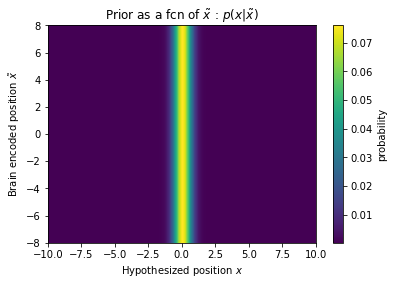

In [53]:
x = np.arange(-10, 10, 0.1)

def calculate_prior_array(x_points, stim_array, p_indep,
                          prior_mean_common=.0, prior_sigma_common=.5,
                          prior_mean_indep=.0, prior_sigma_indep=10):
    """
        'common' stands for common
        'indep' stands for independent
    """

    prior_common = my_gaussian(x_points, prior_mean_common, prior_sigma_common)
    prior_indep = my_gaussian(x_points, prior_mean_indep, prior_sigma_indep)

    prior_mixed = (1 - p_indep) * prior_common + (p_indep * prior_indep)
    prior_mixed /= np.sum(prior_mixed)  # normalize
    prior_array = np.tile(prior_mixed, len(stim_array)).reshape(len(stim_array), -1)
    return prior_array

p_independent=.05
prior_array = calculate_prior_array(x, hypothetical_stim, p_independent)

plot_myarray(prior_array, 'Hypothesized position $x$', 'Brain encoded position $\~x$', 'Prior as a fcn of $\~x$ : $p(x|\~x)$')

---
# Section 3: Bayes Theorem with Complex Posteriors

We now want to calcualte the posterior using *Bayes Rule*. Since we have already created a likelihood and a prior for each brain encoded position $\tilde x$, all we need to do is to multiply them row-wise. That is, each row of the posterior array will be the posterior resulting from the multiplication of the prior and likelihood of the same equivalent row.

Mathematically:

\begin{eqnarray}
    Posterior\left[i, :\right] \propto Likelihood\left[i, :\right] \odot Prior\left[i, :\right]
\end{eqnarray}

where $\odot$ represents the [Hadamard Product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) (i.e., elementwise multiplication) of the corresponding prior and likelihood row vectors `i` from each matrix.

Follow these steps to build the posterior as a function of the brain encoded stimulus $\tilde x$:
* For each row of the prior and likelihood (i.e. each possible brain encoding $\tilde x$), fill in the posterior matrix so that every row of the posterior array represents the posterior density for a different brain encode  $\tilde x$.
* Plot the array using the function `plot_myarray()` already pre-written and commented-out in your script

Optional:
* Do you need to operate on one element--or even one row--at a time? NumPy operations can often process an entire matrix in a single "vectorized" operation. This approach is often much faster and much easier to read than an element-by-element calculation.  Try to write a vectorized version that calculates the posterior without using any for-loops. _Hint_: look at `np.sum` and its keyword arguments.

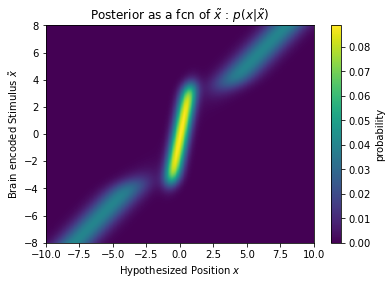

In [54]:
def calculate_posterior_array(prior_array, likelihood_array):

    posterior_array = prior_array * likelihood_array
    posterior_array /= posterior_array.sum(axis=1, keepdims=True)  # normalize each row separately

    return posterior_array

posterior_array = calculate_posterior_array(prior_array, likelihood_array)
plot_myarray(posterior_array,
               'Hypothesized Position $x$',
               'Brain encoded Stimulus $\~x$',
               'Posterior as a fcn of $\~x$ : $p(x | \~x)$')

---
# Section 4: Estimating the position $\hat x$


Now that we have a posterior distribution (for each possible brain encoding $\tilde x$)that represents the brain's estimated stimulus position: $p(x|\tilde x)$, we want to make an estimate (response) of the glasses location $\hat x$ using the posterior distribution. This would represent the subject's estimate if their (for us as experimentalist unobservable) brain encoding took on each possible value. 

This effectively encodes the *decision* that a participant would make for a given brain encoding $\tilde x$. In this exercise, we make the assumptions that participants take the mean of the posterior (decision rule) as a response estimate for the glasses location (use the function `moments_myfunc()` provided to calculate the mean of the posterior).

Using this knowledge, we will now represent $\hat x$ as a function of the encoded stimulus $\tilde x$. This will result in a 2D binary decision array. To do so, we will scan the posterior matrix (i.e. row-wise), and set the array cell value to 1 at the mean of the row-wise posterior.

**Suggestions**
* For each brain encoding $\tilde x$ (row of the posterior array), calculate the mean of the posterior, and set the corresponding cell of the binary decision array to 1. (e.g., if the mean of the posterior is at position 0, then set the cell with x_column == 0 to 1).
* Plot the matrix using the function `plot_myarray()` already pre-written and commented-out in your script

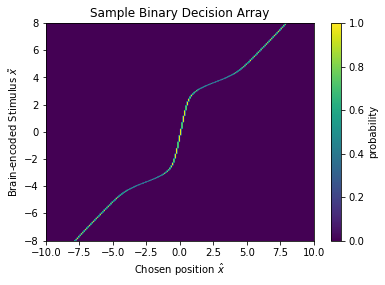

In [56]:
def calculate_binary_decision_array(x_points, posterior_array):

    binary_decision_array = np.zeros_like(posterior_array)

    for i in range(len(posterior_array)):
        # calculate mean of posterior using 'moments_myfunc'
        mean, _, _ = moments_myfunc(x_points, posterior_array[i])
        # find the postion of mean in x_points (closest position)
        idx = np.argmin(np.abs(x_points - mean))
        binary_decision_array[i, idx] = 1

    return binary_decision_array

binary_decision_array = calculate_binary_decision_array(x, posterior_array)
plot_myarray(binary_decision_array,
               'Chosen position $\hat x$', 'Brain-encoded Stimulus $\~ x$',
               'Sample Binary Decision Array')

In [57]:
# Take home message